In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

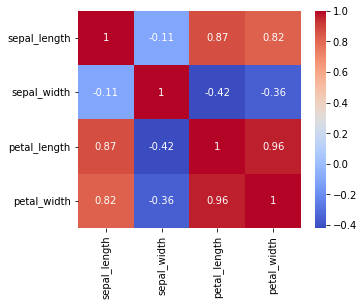

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [12]:
# Separate features (X) and target (y)
X = df.drop('species', axis=1)  # Features
Y = df['species']  # Target

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [16]:
prediction=model.predict(X_test)

In [18]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, prediction)
precision = metrics.precision_score(Y_test,prediction, average='weighted')
recall = metrics.recall_score(Y_test,prediction, average='weighted')
f1_score = metrics.f1_score(Y_test,prediction, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


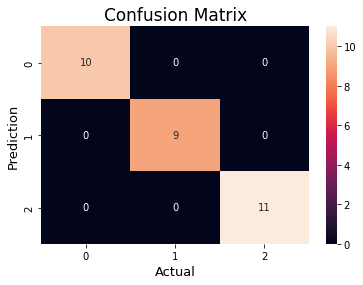

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix=confusion_matrix(Y_test,prediction)
sns.heatmap(confusion_matrix,annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [31]:
import pickle
filename='IRISModel.pkl'
pickle.dump(model, open(filename,'wb'))
loaded_model = pickle.load(open('IRISModel.pkl', 'rb'))